# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load and check the dataset

import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [ ]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [ ]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):
# Low levels of masculinity in male characters do not affect fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


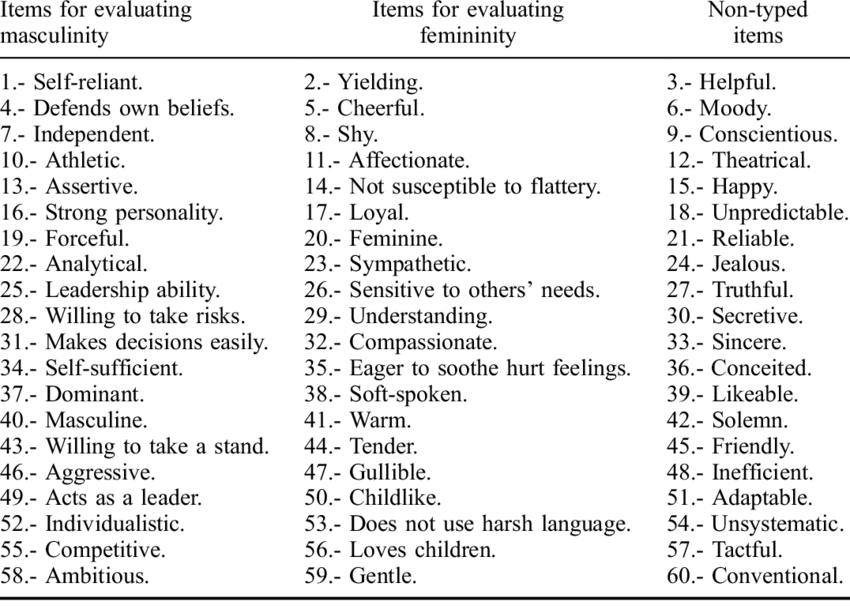

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [ ]:
colab_directory_path = '/content/gdrive/MyDrive/riveter-test'

In [ ]:
%mkdir /content/gdrive/MyDrive/riveter-test

In [ ]:
%cd /content/gdrive/MyDrive/riveter-test

/content/gdrive/MyDrive/riveter-test


In [ ]:
! git clone https://github.com/maartensap/riveter-nlp.git

Cloning into 'riveter-nlp'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 610 (delta 141), reused 164 (delta 109), pack-reused 392
Receiving objects: 100% (610/610), 5.24 MiB | 6.01 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [ ]:
%ls

riveter-nlp/


In [ ]:
%cd /content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter

/content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter


In [ ]:
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 9.9 MB/s eta 0:00:00


In [ ]:
# This will downlaod ~500Mb of data
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python -m spacy download en_core_web_sm

2024-03-16 01:41:03.761225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 01:41:03.761367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 01:41:03.932332: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 01:41:04.290124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 01:41:08.015575: W tensorflow/compiler/tf2

Now we have prepared all the dependencies needed.

In [ ]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error
import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [ ]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [ ]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')

scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [ ]:
from tqdm import tqdm # used to display a progress bar when executing code
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
                  text_ids,
                  num_bootstraps=20,
                  persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:35<53:02, 35.76s/it]

2024-03-16 01:49:22 Complete!
Story ID: 4706144, Masculine Power Score: 0.08277918873858807



Processing stories:   2%|▏         | 2/90 [01:09<50:38, 34.53s/it]

2024-03-16 01:49:55 Complete!
Story ID: 4752980, Masculine Power Score: 0.22204139020045582



Processing stories:   3%|▎         | 3/90 [01:45<51:16, 35.36s/it]

2024-03-16 01:50:32 Complete!
Story ID: 4621698, Masculine Power Score: 0.6031746031746033



Processing stories:   4%|▍         | 4/90 [02:17<48:33, 33.88s/it]

2024-03-16 01:51:03 Complete!
Story ID: 3651108, Masculine Power Score: 0.1368878932753613



Processing stories:   6%|▌         | 5/90 [02:53<49:07, 34.67s/it]

2024-03-16 01:51:39 Complete!
Story ID: 5282729, Masculine Power Score: 0.20983852587078394



Processing stories:   7%|▋         | 6/90 [03:27<48:00, 34.29s/it]

2024-03-16 01:52:13 Complete!
Story ID: 5533886, Masculine Power Score: -0.000631613756613757



Processing stories:   8%|▊         | 7/90 [04:01<47:30, 34.35s/it]

2024-03-16 01:52:48 Complete!
Story ID: 4547622, Masculine Power Score: 0.0699240967111224



Processing stories:   9%|▉         | 8/90 [04:32<45:31, 33.32s/it]

2024-03-16 01:53:19 Complete!
Story ID: 16177508, Masculine Power Score: 0.13695753587576315



Processing stories:  10%|█         | 9/90 [05:06<45:07, 33.43s/it]

2024-03-16 01:53:52 Complete!
Story ID: 15745185, Masculine Power Score: -0.11289599762905167



 33%|███▎      | 1/3 [00:15<00:31, 15.93s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [05:38<44:05, 33.07s/it]

2024-03-16 01:54:25 Complete!
Story ID: 15654528, Masculine Power Score: 0.23442816162071192



Processing stories:  12%|█▏        | 11/90 [06:08<42:18, 32.14s/it]

2024-03-16 01:54:55 Complete!
Story ID: 7448155, Masculine Power Score: 0.32837253824955726



Processing stories:  13%|█▎        | 12/90 [06:44<43:14, 33.27s/it]

2024-03-16 01:55:30 Complete!
Story ID: 4983847, Masculine Power Score: 0.11812898488092052



Processing stories:  14%|█▍        | 13/90 [07:16<42:11, 32.87s/it]

2024-03-16 01:56:02 Complete!
Story ID: 3313118, Masculine Power Score: -0.198709062676454



Processing stories:  16%|█▌        | 14/90 [07:47<40:59, 32.36s/it]

2024-03-16 01:56:34 Complete!
Story ID: 3290390, Masculine Power Score: -0.10401882765070587



Processing stories:  17%|█▋        | 15/90 [08:25<42:42, 34.17s/it]

2024-03-16 01:57:12 Complete!
Story ID: 36435301, Masculine Power Score: 0.03682354402168644



Processing stories:  18%|█▊        | 16/90 [08:56<40:43, 33.02s/it]

2024-03-16 01:57:42 Complete!
Story ID: 36575491, Masculine Power Score: 0.2644662276556069



Processing stories:  19%|█▉        | 17/90 [09:28<40:00, 32.88s/it]

2024-03-16 01:58:15 Complete!
Story ID: 35225224, Masculine Power Score: 0.2285303691233998



Processing stories:  20%|██        | 18/90 [10:01<39:22, 32.82s/it]

2024-03-16 01:58:48 Complete!
Story ID: 4594527, Masculine Power Score: 0.17088827838827841



Processing stories:  21%|██        | 19/90 [10:29<37:15, 31.49s/it]

2024-03-16 01:59:16 Complete!
Story ID: 5485625, Masculine Power Score: 0.1113093802748975



Processing stories:  22%|██▏       | 20/90 [10:59<36:01, 30.89s/it]

2024-03-16 01:59:45 Complete!
Story ID: 36408319, Masculine Power Score: 0.16241604010025065



Processing stories:  23%|██▎       | 21/90 [11:44<40:16, 35.03s/it]

2024-03-16 02:00:30 Complete!
Story ID: 35762659, Masculine Power Score: 0.2175823624080066



Processing stories:  24%|██▍       | 22/90 [12:18<39:32, 34.89s/it]

2024-03-16 02:01:05 Complete!
Story ID: 35603194, Masculine Power Score: 0.3748627467034191



Processing stories:  26%|██▌       | 23/90 [12:51<38:09, 34.17s/it]

2024-03-16 02:01:37 Complete!
Story ID: 35344306, Masculine Power Score: 0.11943143139494383



Processing stories:  27%|██▋       | 24/90 [13:20<36:01, 32.75s/it]

2024-03-16 02:02:07 Complete!
Story ID: 36695155, Masculine Power Score: 0.15444444444444447



Processing stories:  28%|██▊       | 25/90 [13:53<35:32, 32.81s/it]

2024-03-16 02:02:40 Complete!
Story ID: 36064474, Masculine Power Score: 0.08702692427209947



Processing stories:  29%|██▉       | 26/90 [14:26<35:01, 32.84s/it]

2024-03-16 02:03:12 Complete!
Story ID: 36024820, Masculine Power Score: 0.1444549599456047



Processing stories:  30%|███       | 27/90 [15:06<36:36, 34.87s/it]

2024-03-16 02:03:52 Complete!
Story ID: 35182330, Masculine Power Score: -0.021276913875598085



Processing stories:  31%|███       | 28/90 [15:40<35:57, 34.80s/it]

2024-03-16 02:04:27 Complete!
Story ID: 36567496, Masculine Power Score: 0.21544064093888302



Processing stories:  32%|███▏      | 29/90 [16:13<34:53, 34.33s/it]

2024-03-16 02:05:00 Complete!
Story ID: 35560330, Masculine Power Score: 0.13917153684874714



Processing stories:  33%|███▎      | 30/90 [16:51<35:20, 35.33s/it]

2024-03-16 02:05:38 Complete!
Story ID: 35877496, Masculine Power Score: 0.07644950950982451



Processing stories:  34%|███▍      | 31/90 [17:25<34:20, 34.93s/it]

2024-03-16 02:06:12 Complete!
Story ID: 35957410, Masculine Power Score: 0.2962591907972395



Processing stories:  36%|███▌      | 32/90 [17:57<32:47, 33.93s/it]

2024-03-16 02:06:43 Complete!
Story ID: 30947654, Masculine Power Score: 0.027657138535995156



Processing stories:  37%|███▋      | 33/90 [18:32<32:44, 34.47s/it]

2024-03-16 02:07:19 Complete!
Story ID: 36332707, Masculine Power Score: -0.11934460019566402



Processing stories:  38%|███▊      | 34/90 [19:08<32:21, 34.68s/it]

2024-03-16 02:07:54 Complete!
Story ID: 35967940, Masculine Power Score: 0.16813046984899843



Processing stories:  39%|███▉      | 35/90 [19:42<31:45, 34.64s/it]

2024-03-16 02:08:29 Complete!
Story ID: 35001073, Masculine Power Score: 0.14837773337773336



Processing stories:  40%|████      | 36/90 [20:19<31:39, 35.18s/it]

2024-03-16 02:09:05 Complete!
Story ID: 35138911, Masculine Power Score: 0.14024524436453076



Processing stories:  41%|████      | 37/90 [20:48<29:28, 33.38s/it]

2024-03-16 02:09:34 Complete!
Story ID: 35280397, Masculine Power Score: 0.34248783891547047



Processing stories:  42%|████▏     | 38/90 [21:26<30:13, 34.87s/it]

2024-03-16 02:10:13 Complete!
Story ID: 36049939, Masculine Power Score: 0.30557647569693697



Processing stories:  43%|████▎     | 39/90 [22:09<31:47, 37.40s/it]

2024-03-16 02:10:56 Complete!
Story ID: 34995673, Masculine Power Score: 0.16211330960611373



Processing stories:  44%|████▍     | 40/90 [22:48<31:25, 37.71s/it]

2024-03-16 02:11:34 Complete!
Story ID: 33477346, Masculine Power Score: 0.43497668997669



Processing stories:  46%|████▌     | 41/90 [23:18<28:57, 35.46s/it]

2024-03-16 02:12:05 Complete!
Story ID: 36840832, Masculine Power Score: -0.18859127714390872



Processing stories:  47%|████▋     | 42/90 [23:48<27:09, 33.95s/it]

2024-03-16 02:12:35 Complete!
Story ID: 30896276, Masculine Power Score: 0.13142857142857142



Processing stories:  48%|████▊     | 43/90 [24:17<25:17, 32.29s/it]

2024-03-16 02:13:03 Complete!
Story ID: 37363471, Masculine Power Score: 0.4359523809523809



Processing stories:  49%|████▉     | 44/90 [24:48<24:36, 32.09s/it]

2024-03-16 02:13:35 Complete!
Story ID: 36984901, Masculine Power Score: 0.04176401465404023



Processing stories:  50%|█████     | 45/90 [25:21<24:15, 32.35s/it]

2024-03-16 02:14:08 Complete!
Story ID: 33353644, Masculine Power Score: 0.007748162399938205



Processing stories:  51%|█████     | 46/90 [25:53<23:30, 32.06s/it]

2024-03-16 02:14:39 Complete!
Story ID: 37002835, Masculine Power Score: -0.12958541458541456



Processing stories:  52%|█████▏    | 47/90 [26:22<22:22, 31.21s/it]

2024-03-16 02:15:09 Complete!
Story ID: 5630824, Masculine Power Score: 0.29732225300092335



Processing stories:  53%|█████▎    | 48/90 [26:56<22:29, 32.14s/it]

2024-03-16 02:15:43 Complete!
Story ID: 10053617, Masculine Power Score: 0.23402512321806523



Processing stories:  54%|█████▍    | 49/90 [27:29<22:03, 32.28s/it]

2024-03-16 02:16:15 Complete!
Story ID: 1572659, Masculine Power Score: 0.2450313656931304



Processing stories:  56%|█████▌    | 50/90 [28:03<21:47, 32.68s/it]

2024-03-16 02:16:49 Complete!
Story ID: 7450573, Masculine Power Score: 0.18480080291225803



Processing stories:  57%|█████▋    | 51/90 [28:36<21:24, 32.94s/it]

2024-03-16 02:17:23 Complete!
Story ID: 6918676, Masculine Power Score: 0.0758637527539426



Processing stories:  58%|█████▊    | 52/90 [29:16<22:10, 35.01s/it]

2024-03-16 02:18:02 Complete!
Story ID: 6075402, Masculine Power Score: 0.3637102877404019



Processing stories:  59%|█████▉    | 53/90 [29:51<21:32, 34.92s/it]

2024-03-16 02:18:37 Complete!
Story ID: 11101779, Masculine Power Score: 0.3396857528436476



Processing stories:  60%|██████    | 54/90 [30:28<21:17, 35.50s/it]

2024-03-16 02:19:14 Complete!
Story ID: 11321331, Masculine Power Score: 0.08409065738661316



Processing stories:  61%|██████    | 55/90 [30:59<20:04, 34.43s/it]

2024-03-16 02:19:46 Complete!
Story ID: 12284853, Masculine Power Score: 0.09080501349555058



Processing stories:  62%|██████▏   | 56/90 [31:31<19:03, 33.62s/it]

2024-03-16 02:20:18 Complete!
Story ID: 12282003, Masculine Power Score: 0.06383040935672515



Processing stories:  63%|██████▎   | 57/90 [32:06<18:43, 34.05s/it]

2024-03-16 02:20:53 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [32:38<17:47, 33.36s/it]

2024-03-16 02:21:25 Complete!
Story ID: 4228053, Masculine Power Score: 0.21342486651411138



Processing stories:  66%|██████▌   | 59/90 [33:13<17:26, 33.76s/it]

2024-03-16 02:21:59 Complete!
Story ID: 12127317, Masculine Power Score: 0.11120431494948183



Processing stories:  67%|██████▋   | 60/90 [33:42<16:09, 32.30s/it]

2024-03-16 02:22:28 Complete!
Story ID: 12010134, Masculine Power Score: 0.2398253247627322



Processing stories:  68%|██████▊   | 61/90 [34:18<16:09, 33.43s/it]

2024-03-16 02:23:04 Complete!
Story ID: 11510919, Masculine Power Score: 0.5092993191019507



Processing stories:  69%|██████▉   | 62/90 [34:52<15:41, 33.64s/it]

2024-03-16 02:23:38 Complete!
Story ID: 8145802, Masculine Power Score: 0.17308079616309485



Processing stories:  70%|███████   | 63/90 [35:23<14:52, 33.05s/it]

2024-03-16 02:24:10 Complete!
Story ID: 6637942, Masculine Power Score: -0.117372291280135



Processing stories:  71%|███████   | 64/90 [35:56<14:19, 33.05s/it]

2024-03-16 02:24:43 Complete!
Story ID: 7427905, Masculine Power Score: -0.027572388565035622



Processing stories:  72%|███████▏  | 65/90 [36:29<13:39, 32.77s/it]

2024-03-16 02:25:15 Complete!
Story ID: 3893857, Masculine Power Score: 0.12633622735481131



Processing stories:  73%|███████▎  | 66/90 [37:00<12:57, 32.39s/it]

2024-03-16 02:25:47 Complete!
Story ID: 33040258, Masculine Power Score: 0.18321428571428572



Processing stories:  74%|███████▍  | 67/90 [37:37<12:54, 33.69s/it]

2024-03-16 02:26:23 Complete!
Story ID: 33858850, Masculine Power Score: -0.17422185657479775



Processing stories:  76%|███████▌  | 68/90 [38:11<12:23, 33.77s/it]

2024-03-16 02:26:57 Complete!
Story ID: 2775776, Masculine Power Score: 0.2492965367965368



Processing stories:  77%|███████▋  | 69/90 [38:44<11:44, 33.56s/it]

2024-03-16 02:27:30 Complete!
Story ID: 3197963, Masculine Power Score: 0.3340811965811966



Processing stories:  78%|███████▊  | 70/90 [39:18<11:15, 33.79s/it]

2024-03-16 02:28:05 Complete!
Story ID: 12395199, Masculine Power Score: 0.16297542277822502



Processing stories:  79%|███████▉  | 71/90 [39:48<10:22, 32.74s/it]

2024-03-16 02:28:35 Complete!
Story ID: 10934010, Masculine Power Score: 0.2471850834350834



Processing stories:  80%|████████  | 72/90 [40:18<09:31, 31.75s/it]

2024-03-16 02:29:04 Complete!
Story ID: 12301116, Masculine Power Score: -0.024417603510981236



Processing stories:  81%|████████  | 73/90 [40:51<09:05, 32.10s/it]

2024-03-16 02:29:37 Complete!
Story ID: 12706317, Masculine Power Score: -0.10564478276807346



Processing stories:  82%|████████▏ | 74/90 [41:28<08:56, 33.51s/it]

2024-03-16 02:30:14 Complete!
Story ID: 11499468, Masculine Power Score: -0.044567361870746544



Processing stories:  83%|████████▎ | 75/90 [41:58<08:06, 32.42s/it]

2024-03-16 02:30:44 Complete!
Story ID: 12184146, Masculine Power Score: 0.3270029105020616



Processing stories:  84%|████████▍ | 76/90 [42:29<07:31, 32.27s/it]

2024-03-16 02:31:16 Complete!
Story ID: 12201333, Masculine Power Score: 0.09683262097942627



Processing stories:  86%|████████▌ | 77/90 [43:06<07:17, 33.68s/it]

2024-03-16 02:31:53 Complete!
Story ID: 11496030, Masculine Power Score: -0.06598412248171844



Processing stories:  87%|████████▋ | 78/90 [43:41<06:45, 33.83s/it]

2024-03-16 02:32:27 Complete!
Story ID: 11510277, Masculine Power Score: 0.22299639453826878



Processing stories:  88%|████████▊ | 79/90 [44:16<06:16, 34.19s/it]

2024-03-16 02:33:02 Complete!
Story ID: 10772274, Masculine Power Score: 0.40753718435580294



Processing stories:  89%|████████▉ | 80/90 [44:51<05:44, 34.46s/it]

2024-03-16 02:33:37 Complete!
Story ID: 12646050, Masculine Power Score: 0.045503246753246754



Processing stories:  90%|█████████ | 81/90 [45:22<05:01, 33.45s/it]

2024-03-16 02:34:08 Complete!
Story ID: 11161479, Masculine Power Score: -0.012420777568212797



Processing stories:  91%|█████████ | 82/90 [45:53<04:21, 32.69s/it]

2024-03-16 02:34:39 Complete!
Story ID: 12069936, Masculine Power Score: 0.059220686852265794



Processing stories:  92%|█████████▏| 83/90 [46:28<03:55, 33.62s/it]

2024-03-16 02:35:15 Complete!
Story ID: 12285972, Masculine Power Score: 0.4183693265451024



Processing stories:  93%|█████████▎| 84/90 [46:59<03:15, 32.63s/it]

2024-03-16 02:35:45 Complete!
Story ID: 12372702, Masculine Power Score: -0.010911236658275024



Processing stories:  94%|█████████▍| 85/90 [47:32<02:43, 32.72s/it]

2024-03-16 02:36:18 Complete!
Story ID: 12610496, Masculine Power Score: 0.07803606974198193



Processing stories:  96%|█████████▌| 86/90 [48:06<02:12, 33.20s/it]

2024-03-16 02:36:53 Complete!
Story ID: 10970472, Masculine Power Score: 0.06799242424242424



Processing stories:  97%|█████████▋| 87/90 [48:36<01:37, 32.34s/it]

2024-03-16 02:37:23 Complete!
Story ID: 12084552, Masculine Power Score: 0.32945090330824406



Processing stories:  98%|█████████▊| 88/90 [49:13<01:07, 33.72s/it]

2024-03-16 02:38:00 Complete!
Story ID: 12727119, Masculine Power Score: -0.01613132168096955



Processing stories:  99%|█████████▉| 89/90 [49:46<00:33, 33.28s/it]

2024-03-16 02:38:32 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [50:19<00:00, 33.55s/it]

2024-03-16 02:39:05 Complete!
Story ID: 10859508, Masculine Power Score: 0.2168731165339639


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [ ]:
# Q2 (code)

print(df[['story_id', 'masculine_power_score']].head())


   story_id  masculine_power_score
0   4706144               0.082779
1   4752980               0.222041
3   4621698               0.603175
5   3651108               0.136888
7   5282729               0.209839


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/gdrive/MyDrive/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [ ]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=761e6b6c2446b2227379377cd7381d8783c4eb40c0d1225ac98cbd4591733e85
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [ ]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.082779,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.222041,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.603175,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.136888,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.209839,0.376110


In [ ]:
df.to_csv('/content/gdrive/MyDrive/df0.csv', index=False)

Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


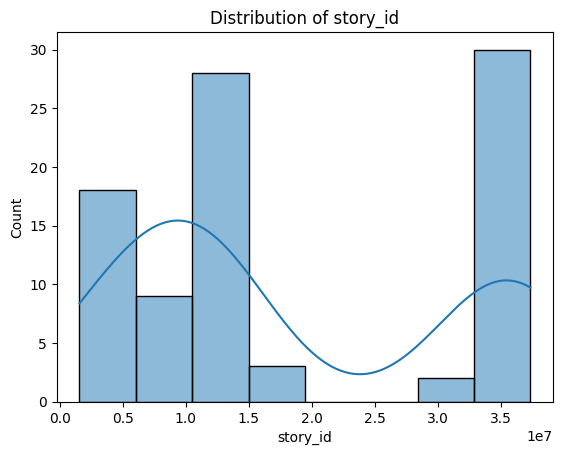

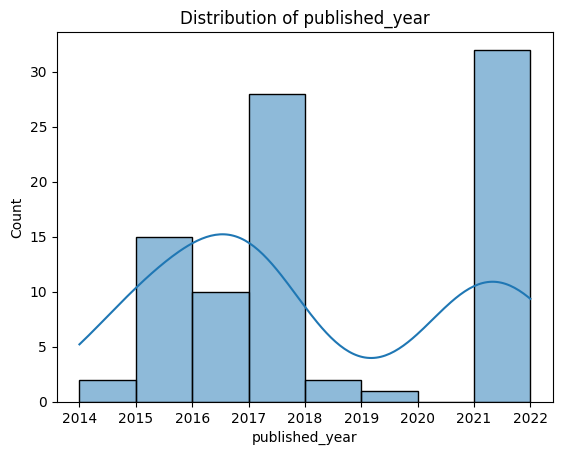

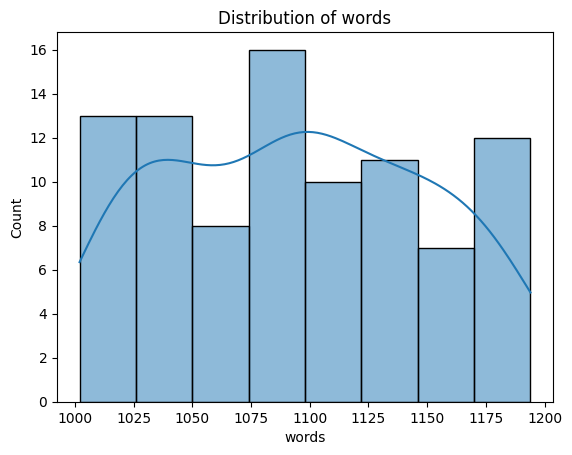

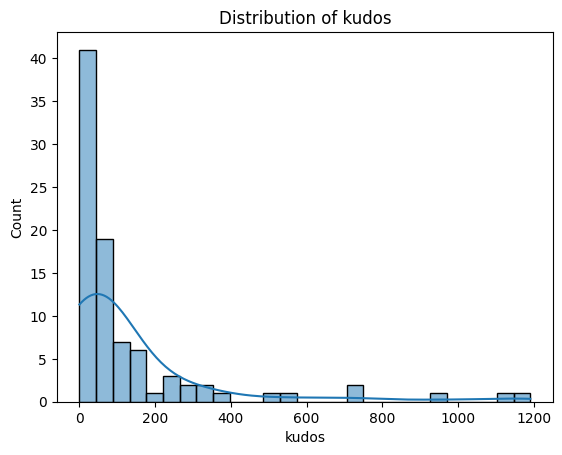

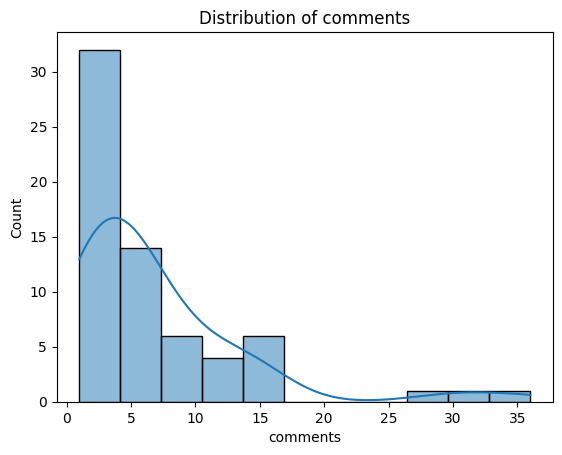

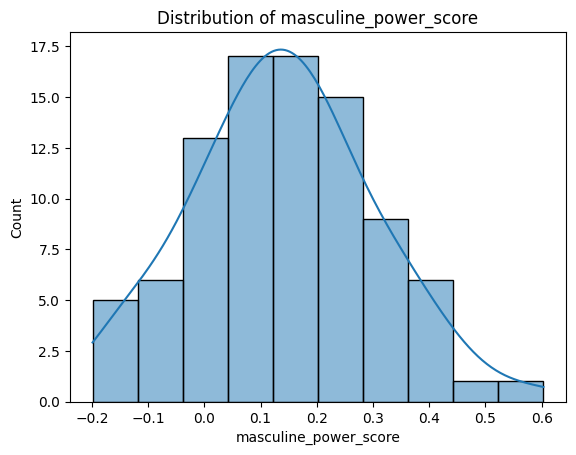

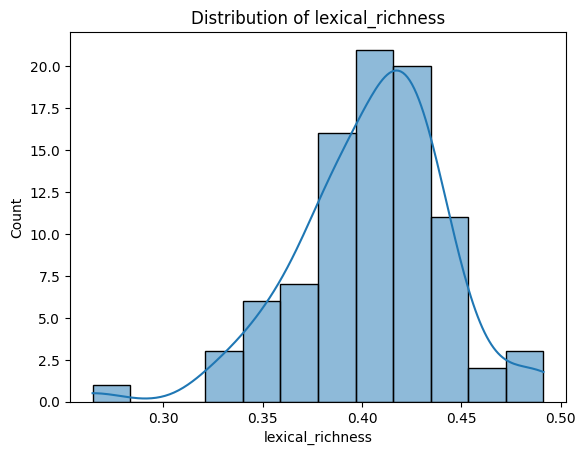

In [ ]:
# Q3a (code): Check data distribution
# Check the distribution of the data for each numerical feature
# Import seaborn, matplotlib.pyplot, and pandas for data visualization and manipulation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read a CSV file into a DataFrame df
df = pd.read_csv('/content/gdrive/MyDrive/df0.csv', encoding="UTF-8")


for column in df.select_dtypes(include=['float64', 'int']): # Loop through each numerical column in df (specifically those with types float64 and int)
    sns.histplot(df[column].dropna(), kde=True) # For each such column, create a histogram with a Kernel Density Estimate (KDE) to show the distribution
    plt.title(f'Distribution of {column}') # Set the title of each histogram to the name of the column being visualized
    plt.show() # Display the histogram plot


In [ ]:
# Q3b (code): compute some descriptive statistics
# Compute descriptive statistics for the numerical features
df.describe()


,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.140146,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.161639,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.198709,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.038059,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.138065,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.234327,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.603175,0.491349


In [ ]:
# Q3c (code): Check for any missing values
# Check for missing values in the dataset
df.isnull().sum()


story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64

In [ ]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
# Replace all NA values with zeros
df.fillna(0, inplace=True)

# Check again for missing values to confirm they are all filled
df.isnull().sum()


story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

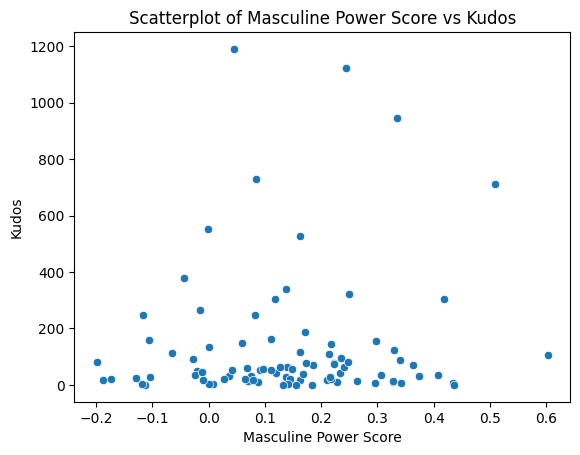

In [ ]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

sns.scatterplot(data=df, x='masculine_power_score', y='kudos') # Creates a scatterplot from dataframe `df` with `masculine_power_score` on the x-axis and `kudos` on the y-axis
plt.title('Scatterplot of Masculine Power Score vs Kudos') # Sets the title of the scatterplot
plt.xlabel('Masculine Power Score') # Labels the x-axis as 'Masculine Power Score'
plt.ylabel('Kudos') # Labels the y-axis as 'Kudos'
plt.show() # Displays the plot



**Q5. Multiple Regression and Analysis**

In [ ]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary

import statsmodels.api as sm

# Assuming 'df' is your dataframe and it contains 'masculine_power_score', 'published_year', and 'words' as columns.
# Adding a constant term for intercept
X = df[['masculine_power_score', 'published_year', 'words']]
X = sm.add_constant(X)
y = df['kudos']

model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     5.725
Date:                Sat, 16 Mar 2024   Prob (F-statistic):            0.00128
Time:                        02:44:05   Log-Likelihood:                -608.09
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.987e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared
#The R-squared value indicates the percentage of the dependent variable variation that a linear model explains.
#Our model's R-squared value of 0.162 means that it accounts for 16.2% of the variation in kudos, which is relatively low, suggesting that other factors not included in the model may play a significant role in the number of kudos received.

#The Adjusted R-squared value compensates for the number of predictors in the model relative to the number of data points.
#An adjusted R-squared of 0.133 means that after adjusting for the number of predictors, the model still explains about 13.3% of the variability, which reinforces the idea that other unaccounted variables might be influential.


In [ ]:
# Q6b (words): Interpret F-test result
# The F-test in regression compares a model with no predictors to the specified model to determine whether the overall regression model is statistically significant.
# Our model's large F-statistic (5.861) and its associated low p-value (0.00155) suggest that the model is statistically significant and that the independent variables, collectively, are likely to be related to the dependent variable, which is the number of kudos.


In [ ]:
# Q6c (words): Interpret coefficients and t-test result
#The constant term (6.99e+04) represents the intercept of the regression line, which is the expected value of the dependent variable when all predictors are set to zero. This value is statistically significant, indicating that even without any of the independent variables, the starting point for the number of kudos is not zero.

#For the coefficients of the independent variables, the t-test evaluates if each coefficient is significantly different from zero, meaning it has an effect on the dependent variable:
#- The coefficient for 'masculine_power_score' is not statistically significant (p-value: 0.668), suggesting that this variable does not have a clear effect on the number of kudos.
#- Similarly, 'lexical_richness' is also not significant (p-value: 0.524), indicating that this variable does not impact the number of kudos within this model.
#- 'published_year', on the other hand, has a negative coefficient (-34.6801) with a statistically significant p-value (0.001), indicating that more recently published stories tend to have fewer kudos.


Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [ ]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

from scipy import stats

# Calculate residuals from the OLS model
residuals = model.resid

# Perform the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(shapiro_test)


ShapiroResult(statistic=0.7003555297851562, pvalue=2.92873299397034e-12)


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:
# If the Shapiro-Wilk test p-value is less than 0.05, we reject the null hypothesis and conclude that the data does not come from a normal distribution.
# If the p-value is greater than 0.05, we fail to reject the null hypothesis, suggesting that the residuals could be from a normally distributed population.
# It is important to note that the Shapiro-Wilk test can be sensitive to large sample sizes.


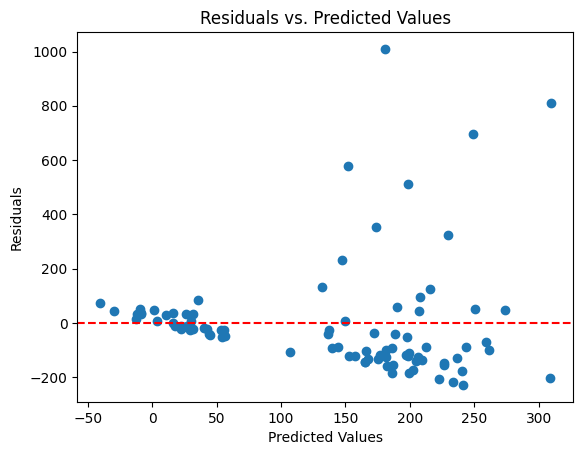

In [ ]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

plt.scatter(model.predict(), residuals) # Plots the predicted values against the residuals
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y=0 to help visualize the zero point
plt.title('Residuals vs. Predicted Values') # Sets the title of the plot
plt.xlabel('Predicted Values') # Labels the x-axis as 'Predicted Values'
plt.ylabel('Residuals') # Labels the y-axis as 'Residuals'
plt.show()



In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:
# To evaluate homoscedasticity, we look at the scatter plot of residuals versus predicted values.
# If the residuals are evenly scattered throughout the range of predicted values without forming any discernible patterns, this indicates homoscedasticity, meaning the variance of errors is consistent across all levels of the independent variables.
# Conversely, if we see patterns, such as a funnel shape where residuals spread out as the predicted value increases or decreases, this indicates heteroscedasticity, which violates the assumption of equal variance in the regression model.


**Q8: Multicollinearity**

In [ ]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Assuming 'X' is the DataFrame containing our independent variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,const,605508.938033
1,masculine_power_score,1.002470
2,published_year,1.002413
3,words,1.000057


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:
#The Variance Inflation Factor (VIF) provides a quantification of the severity of multicollinearity in an ordinary least squares regression analysis.
#VIF values close to 1 suggest that multicollinearity is not present among the variables in question, indicating that they provide independent information to the model.
#Here, the VIF values for masculine_power_score, lexical_richness, and published_year being close to 1 imply low multicollinearity, which is ideal for regression analysis.

# However, a high VIF for the constant term might indicate numerical issues that are not necessarily related to multicollinearity but could be due to a difference in scale among the predictors.
# This could be a result of a large intercept or a high degree of leverage for one or more cases. It is also possible that the high VIF for the constant is a result of a model specification issue, such as omitting a key variable that is correlated with the included predictors.
# This should be investigated further, perhaps by standardizing variables or reviewing the model setup.


**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
# Reflecting on the entire research framework and results, it appears there is room for improvement in the model's explanatory power, as indicated by the R-squared value.
# Considering additional variables that might influence the number of kudos could enhance the model. For example, integrating qualitative aspects of the stories, such as genre or author reputation, might provide more insight.

# Moreover, it could be beneficial to explore non-linear relationships or interaction effects between variables that the current model does not account for.
# The presence of high VIF for the constant term suggests further investigation into model specification is needed. This could involve checking for data entry errors, considering variable transformations, or including polynomial terms if appropriate.

# Finally, ensuring that the dataset is complete and free from missing values, and conducting robustness checks with different subsets of data or using techniques like bootstrapping, could strengthen the findings.
# Overall, while the model presents a starting point for understanding factors influencing fanfiction success, it certainly invites additional exploration to capture the complexities of reader engagement and story popularity.


##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.